In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report


 ## Business Problem
Use Random Forest to prepare a model on fraud data

## Data collection and description

In [2]:
Fraud = pd.read_csv(r'Fraud_check.csv')
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Fraud=pd.read_csv('Fraud_check.csv')
Fraud.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
Fraud = Fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})
Fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
Fraud['Income_range'] = np.where(Fraud['Taxable_Income']>=30000, 'Good', 'Risky')
Fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


## Data Preprocessing

In [6]:
Fraud_data = pd.get_dummies(Fraud.iloc[:,:6])
Fraud_data


,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [7]:
Fd= Fraud_data.drop(columns={'Taxable_Income'},axis=1)
Fd

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [8]:
Fd1 = pd.concat([Fraud['Income_range'], Fd], axis=1)
Fd1

,Income_range,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [9]:
Fraud.shape

(600, 7)

In [10]:
Fraud.isna().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
Income_range       0
dtype: int64

In [11]:
Fraud.dtypes

Undergrad          object
Marital_Status     object
Taxable_Income      int64
City_Population     int64
Work_Experience     int64
Urban              object
Income_range       object
dtype: object

In [12]:
Fraud2=pd.get_dummies(Fraud,columns=['Undergrad','Urban'],drop_first=True)
Fraud2.head()

,Marital_Status,Taxable_Income,City_Population,Work_Experience,Income_range,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,Good,0,1
1,Divorced,33700,134075,18,Good,1,1
2,Married,36925,160205,30,Good,0,1
3,Single,50190,193264,15,Good,1,1
4,Married,81002,27533,28,Good,0,0


In [13]:
Fraud3=pd.get_dummies(Fraud2,columns=['Marital_Status'])
Fraud3.head()

,Taxable_Income,City_Population,Work_Experience,Income_range,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,68833,50047,10,Good,0,1,0,0,1
1,33700,134075,18,Good,1,1,1,0,0
2,36925,160205,30,Good,0,1,0,1,0
3,50190,193264,15,Good,1,1,0,0,1
4,81002,27533,28,Good,0,0,0,1,0


####  Here we are taking taxable income as dependent variable as we have to build model to know the person's tax income is in risky or good.so it is categorised by income<30000 as risky and income>30000 as good

In [14]:
Fraud3["Taxable_Income"] = pd.cut(Fraud3["Taxable_Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
Fraud3.head()

,Taxable_Income,City_Population,Work_Experience,Income_range,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,Good,50047,10,Good,0,1,0,0,1
1,Good,134075,18,Good,1,1,1,0,0
2,Good,160205,30,Good,0,1,0,1,0
3,Good,193264,15,Good,1,1,0,0,1
4,Good,27533,28,Good,0,0,0,1,0


In [15]:
Fraud4=pd.get_dummies(Fraud3,columns=['Taxable_Income'],drop_first=True)
Fraud4.head()

,City_Population,Work_Experience,Income_range,Undergrad_YES,Urban_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Taxable_Income_Good
0,50047,10,Good,0,1,0,0,1,1
1,134075,18,Good,1,1,1,0,0,1
2,160205,30,Good,0,1,0,1,0,1
3,193264,15,Good,1,1,0,0,1,1
4,27533,28,Good,0,0,0,1,0,1


In [16]:
x=Fraud4.iloc[:,0:7]
y=Fraud4.iloc[:,7]

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=4)

In [18]:
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(420, 7) (420,) (180, 7) (180,)


## EDA

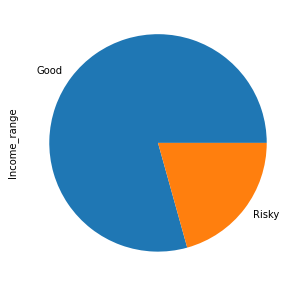

Good     476
Risky    124
Name: Income_range, dtype: int64


In [19]:
plt.figure(figsize=(5,5))
Fd1['Income_range'].value_counts().plot.pie()
plt.show()
print(Fd1['Income_range'].value_counts())

In [20]:
Fd1.isnull().sum()

Income_range               0
City_Population            0
Work_Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

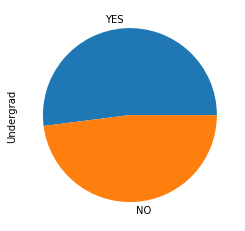

YES    312
NO     288
Name: Undergrad, dtype: int64


In [21]:
Fraud['Undergrad'].value_counts().plot.pie()
plt.show()
print(Fraud['Undergrad'].value_counts())

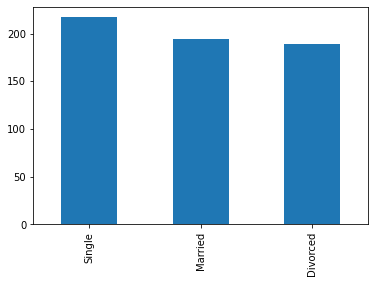

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [22]:
Fraud['Marital_Status'].value_counts(sort=True).plot.bar()
plt.show()
print(Fraud['Marital_Status'].value_counts())

## Model Building

###   Building Decision Tree Classifier using Entropy Criteria

###   Random Forest Model

###   Model 1

In [23]:
x=Fd1.iloc[:,1:]
y=Fd1['Income_range']

In [24]:
x

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [25]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income_range, Length: 600, dtype: object

In [26]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.35,random_state=42)

In [27]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [28]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.7512820512820513


In [29]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)

col_0,Good,Risky
Income_range,,
Good,151,13
Risky,45,1


In [30]:
# The accuracy of model predicting the person's income_taxation is Risky or Good is 76%

In [31]:
# Accuracy 
np.mean(Random_forest_preds==y_test)

0.7238095238095238

In [32]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.7238095238095238
Classification Report :
               precision    recall  f1-score   support

        Good       0.77      0.92      0.84       164
       Risky       0.07      0.02      0.03        46

    accuracy                           0.72       210
   macro avg       0.42      0.47      0.44       210
weighted avg       0.62      0.72      0.66       210



###   Model 2

In [33]:
# Splitting data into training and testing data set
x_train1, x_test1,y_train1,y_test1 = train_test_split(x,y, test_size=0.4,random_state=42)

In [34]:
num_trees = 150
max_features = 4
kfold = KFold(n_splits=15)
Random_forest_model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model1.fit(x_train1,y_train1)

RandomForestClassifier(max_features=4, n_estimators=150)

In [35]:
Random_forest_results1 = cross_val_score(Random_forest_model1, x_train1, y_train1, cv=kfold)
print(Random_forest_results1.mean())

0.7527777777777779


In [36]:
Random_forest_preds1 = Random_forest_model1.predict(x_test1)
pd.crosstab(y_test1,Random_forest_preds1)

col_0,Good,Risky
Income_range,,
Good,176,11
Risky,51,2


In [37]:
# Accuracy 
np.mean(Random_forest_preds1==y_test1)

0.7416666666666667

In [38]:
print('Accuracy Score        :',accuracy_score(y_test1,Random_forest_preds1))
print('Classification Report :\n',classification_report(y_test1,Random_forest_preds1))


Accuracy Score        : 0.7416666666666667
Classification Report :
               precision    recall  f1-score   support

        Good       0.78      0.94      0.85       187
       Risky       0.15      0.04      0.06        53

    accuracy                           0.74       240
   macro avg       0.46      0.49      0.46       240
weighted avg       0.64      0.74      0.68       240



###   Model 3

In [39]:
# Splitting data into training and testing data set
x_train2, x_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.33,random_state=82)

In [40]:
num_trees = 200
max_features = 5
kfold = KFold(n_splits=20)
Random_forest_model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model2.fit(x_train2,y_train2)

RandomForestClassifier(max_features=5, n_estimators=200)

In [41]:
Random_forest_results2 = cross_val_score(Random_forest_model2, x_train2, y_train2, cv=kfold)
print(Random_forest_results2.mean())

0.7907142857142857


In [42]:
Random_forest_preds2 = Random_forest_model2.predict(x_test2)
pd.crosstab(y_test2,Random_forest_preds2)


col_0,Good,Risky
Income_range,,
Good,145,4
Risky,49,0


In [43]:
# Accuracy 
np.mean(Random_forest_preds2==y_test2)

0.7323232323232324

In [44]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.7238095238095238
Classification Report :
               precision    recall  f1-score   support

        Good       0.77      0.92      0.84       164
       Risky       0.07      0.02      0.03        46

    accuracy                           0.72       210
   macro avg       0.42      0.47      0.44       210
weighted avg       0.62      0.72      0.66       210



## Check Grid Search CV to get best Parameters

In [45]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator = RandomForestClassifier(),
                       param_grid = {'n_estimators':[5,10,15,20,30,50,75,100,125,150,175,200],
                                      'criterion': ['gini','entropy'],
                                      'max_depth' : [2,3,5,6,7,8,9,10],
                                      'max_features': [3,4,5,6]},
                                        cv=5)
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 125,
                                          150, 175, 200]})

In [46]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'n_estimators': 20}

In [47]:
grid_cv.best_score_

0.8025641025641026

####   Now, building the model with max_depth 8 , Entropy Criteria , n_estimators - 30, max_features 5

In [50]:
rf_final = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_features=5)
rf_final.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5)

## Training Accuracy

In [51]:
y_pred_final_train = rf_final.predict(x_train)

In [52]:
print('Accuracy Score        :',accuracy_score(y_train,y_pred_final_train))
print('Classification Report :\n',classification_report(y_train,y_pred_final_train))

Accuracy Score        : 0.958974358974359
Classification Report :
               precision    recall  f1-score   support

        Good       0.95      1.00      0.97       312
       Risky       1.00      0.79      0.89        78

    accuracy                           0.96       390
   macro avg       0.98      0.90      0.93       390
weighted avg       0.96      0.96      0.96       390



## Testing Accuracy

In [53]:
y_pred_final_test = rf_final.predict(x_test)

In [54]:
print('Accuracy Score        :',accuracy_score(y_test,y_pred_final_test))
print('Classification Report :\n',classification_report(y_test,y_pred_final_test))

Accuracy Score        : 0.7714285714285715
Classification Report :
               precision    recall  f1-score   support

        Good       0.78      0.98      0.87       164
       Risky       0.25      0.02      0.04        46

    accuracy                           0.77       210
   macro avg       0.52      0.50      0.46       210
weighted avg       0.67      0.77      0.69       210



In [55]:
feature_importance = pd.DataFrame({ 'Features'  : x_train.columns,'RF_Features': rf_final.feature_importances_})
feature_importance

,Features,RF_Features
0,City_Population,0.511799
1,Work_Experience,0.305523
2,Undergrad_NO,0.024961
3,Undergrad_YES,0.028156
4,Marital_Status_Divorced,0.023392
5,Marital_Status_Married,0.024772
6,Marital_Status_Single,0.027085
7,Urban_NO,0.026226
8,Urban_YES,0.028086


In [56]:
Rf_feature_imp =feature_importance.sort_values(by= 'RF_Features',axis=0,ascending=False,)
Rf_feature_imp

,Features,RF_Features
0,City_Population,0.511799
1,Work_Experience,0.305523
3,Undergrad_YES,0.028156
8,Urban_YES,0.028086
6,Marital_Status_Single,0.027085
7,Urban_NO,0.026226
2,Undergrad_NO,0.024961
5,Marital_Status_Married,0.024772
4,Marital_Status_Divorced,0.023392


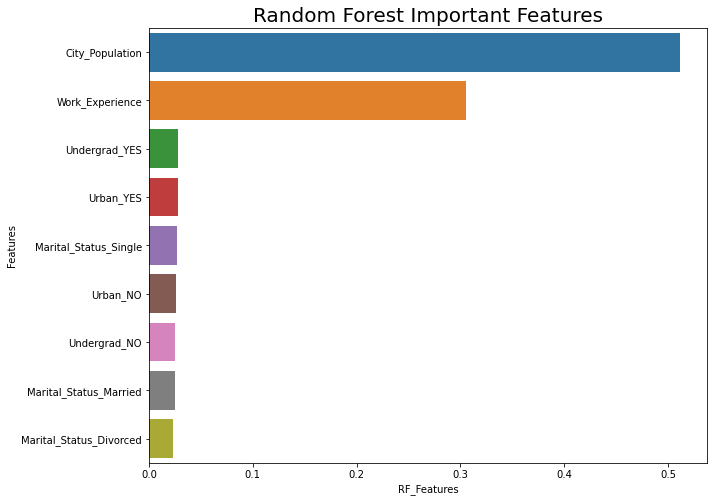

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=Rf_feature_imp,)
plt.title('Random Forest Important Features',size = 20)
plt.show()